# Kernels and Linearly Seperating Hyperplanes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

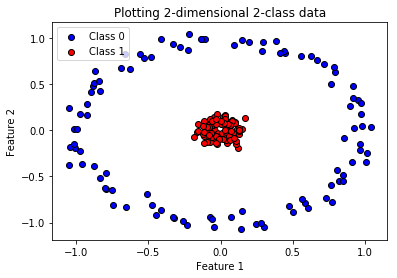

In [2]:
def generate_circle_dataset(plot=False):
    cd = datasets.make_circles(n_samples=200, noise=0.05, random_state=123, factor=0.1)
    X = cd[0]
    y = cd[1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    if(plot):
        X0 = X[y==0]
        X1 = X[y==1]
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(X0[:,0], X0[:,1], color = 'b', edgecolor='k', label = 'Class 0')
        plt.scatter(X1[:,0], X1[:,1], color = 'r', edgecolor='k', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_circle_dataset(plot=True)

In [3]:
def plot(clf, X, y, show_vectors=False,d=0):

    cmap = plt.cm.coolwarm
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    if (d!=0):
        poly = PolynomialFeatures(d)
        temp = poly.fit_transform(temp)

    P = model.decision_function(temp).reshape(yy.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)
    plt.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if(show_vectors):
        support_vectors = model.support_vectors_
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='white') 
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xticks(())
    plt.yticks(())
    plt.show()

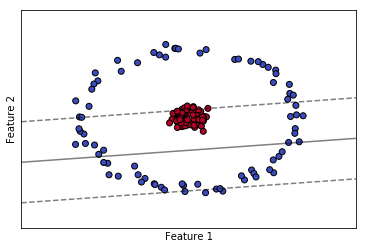

In [4]:
X_train, X_test, y_train, y_test = generate_circle_dataset()

model = SVC(kernel = 'linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot(model,X_train,y_train)

It is clear that no linear model will be able to seperate this data properly.

# Polynomial Basis Expansion

Recall that we used Basis Expansions on linear models, to fit nonlinear decision boundaries. Let us visualize the results of a quadratic basis expansion.

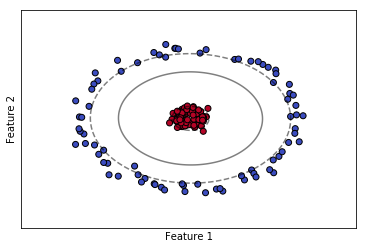

In [5]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)

model = SVC(kernel = 'linear')
model.fit(X_train_poly,y_train)
plot(model,X_train,y_train,d=2)

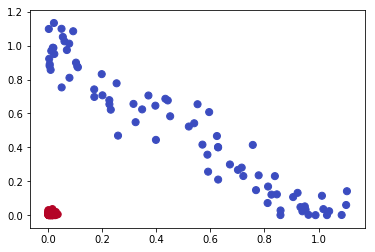

In [6]:
X2 = X_train*X_train
plt.scatter(X2[:, 0], X2[:, 1], c=y_train, s=50, cmap=plt.cm.coolwarm)
plt.show()

The data is linearly sepearable in this dimension!

We can use the Polynomial Kernel in our SVM to achieve this basis expansion in an efficient manner.

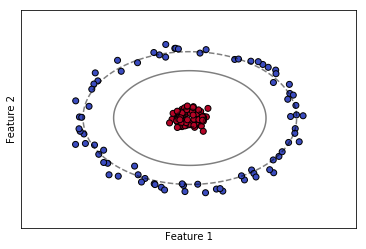

In [7]:
model = SVC(kernel = 'poly', degree=2)
model.fit(X_train,y_train)
plot(model,X_train,y_train)

# Radial Basis Functions

Let us compute a radial basis function centred at the origin, where the middle clump lies.

$$ r = \sum_{i=1}^m exp(-X^2)$$

In [8]:
r = np.exp(-(X_train ** 2).sum(1))

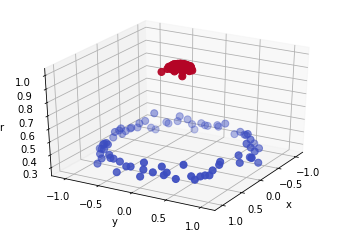

In [9]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X_train, y=y_train):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.coolwarm)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=30, azim=30, X=X_train, y=y_train)    

We can compute radial basis functions at every point, and automatically find the best basis function to use. For this, we can use the RBF kernel in our SVM.

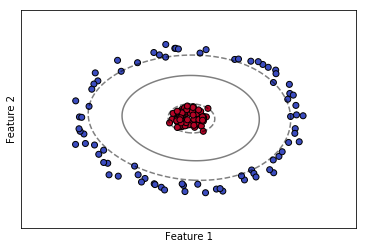

In [10]:
X_train, X_test, y_train, y_test = generate_circle_dataset()

model = SVC(kernel = 'rbf', C=1E6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot(model,X_train,y_train)